Instrucciones: 

Crear una función que muestre los siguientes gráficos
(simultáneamente) para las variables numéricas, según una variable
cualitativa:

❖ Cajas y bigotes

❖ Barras de la media

❖ Histograma con densidad (Curva)

In [2]:
import numpy as np
import pandas as pd
import math 
import statistics
import seaborn as sns  #visualizaciones por excelencia
from scipy import stats #contiene modulos de estadisticas
import missingno as msno #nos ayuda con los datos perdidos
import matplotlib.pyplot as plt #visualizaciones por excelencia

In [3]:
from google.colab import files
files.upload()

Saving autos.csv to autos (1).csv


{'autos.csv': b"Millas_Por_Galon;Cilindros;Pais_Origen;Peso_En_Libras;Desplazamiento;Aceleracion;Nombre;Anyo;Caballo_De_Fuerza\r\n18;8;USA;3504;307;12;chevrolet chevelle malibu;1/01/1970;130\r\n15;8;USA;3693;350;11.5;buick skylark 320;1/01/1970;165\r\n18;8;USA;3436;318;11;plymouth satellite;1/01/1970;150\r\n16;8;USA;3433;304;12;amc rebel sst;1/01/1970;150\r\n17;8;USA;3449;302;10.5;ford torino;1/01/1970;140\r\n15;8;USA;4341;429;10;ford galaxie 500;1/01/1970;198\r\n14;8;USA;4354;454;9;chevrolet impala;1/01/1970;220\r\n14;8;USA;4312;440;8.5;plymouth fury iii;1/01/1970;215\r\n14;8;USA;4425;455;10;pontiac catalina;1/01/1970;225\r\n15;8;USA;3850;390;8.5;amc ambassador dpl;1/01/1970;190\r\nNA;4;Europe;3090;133;17.5;citroen ds-21 pallas;1/01/1970;115\r\nNA;8;USA;4142;350;11.5;chevrolet chevelle concours (sw);1/01/1970;165\r\nNA;8;USA;4034;351;11;ford torino (sw);1/01/1970;153\r\nNA;8;USA;4166;383;10.5;plymouth satellite (sw);1/01/1970;175\r\nNA;8;USA;3850;360;11;amc rebel sst (sw);1/01/1970;17

In [4]:
data_autos = pd.read_csv('autos.csv', sep=";")
data_autos.head(3)

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,1/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,1/01/1970,150.0


Limpiamos la informacion, todos nuestros valores nulos

In [5]:
data_autos["Millas_Por_Galon"].fillna(np.mean(data_autos["Millas_Por_Galon"]), inplace = True)
data_autos["Caballo_De_Fuerza"].fillna(np.mean(data_autos["Caballo_De_Fuerza"]), inplace = True)
data_autos.isnull().sum()

Millas_Por_Galon     0
Cilindros            0
Pais_Origen          0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Nombre               0
Anyo                 0
Caballo_De_Fuerza    0
dtype: int64

Revisamos el dataframe

In [6]:
data_autos.head(1)

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,1/01/1970,130.0


## **Probamos creando los graficos individualmente**

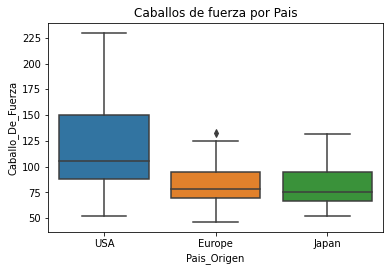

In [7]:
fig, ax = plt.subplots(figsize=(6, 3.84))  #ax para ubicar donde graficaremos

sns.boxplot( # violinplot boxplot
        x     = 'Pais_Origen',  # variable cualitativa
        y     = 'Caballo_De_Fuerza',  # variable cuantitativa
        data  = data_autos,   # dataframe
        ax    = ax  
    )

ax.set_title('Caballos de fuerza por Pais');

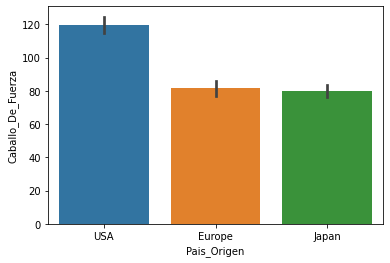

In [8]:
# gráfico de la media de caballos de fuerza por pais con sus intervalos de confianza

sns.barplot(x ="Pais_Origen" , y ="Caballo_De_Fuerza" , 
            estimator = np.mean,  # mediana, estimator nos indica la metrica que queremos
            data=data_autos)
plt.show() #caballos de fuerza promedio por cada  pais de origen

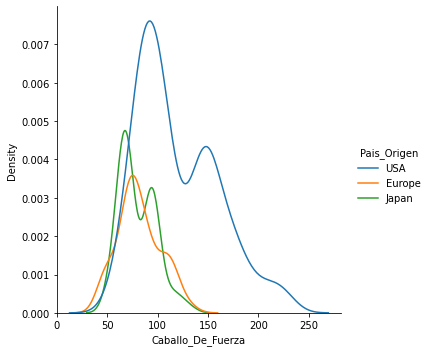

In [9]:
sns.displot(data=data_autos, x="Caballo_De_Fuerza", hue="Pais_Origen", kind="kde")

# Creamos nuestro codigo que nos mostraran nuestras graficas simultaneamente para despues meterlo a una funcion

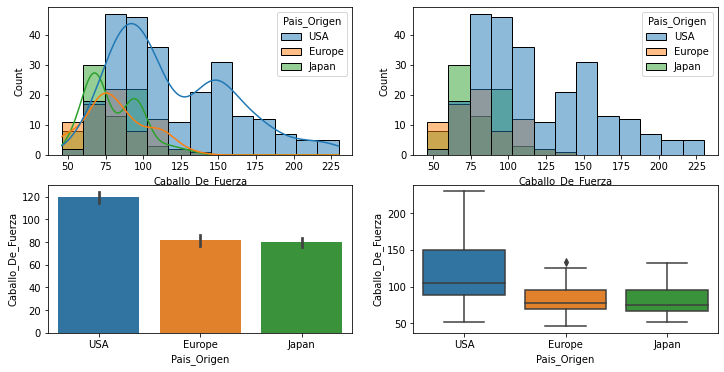

In [15]:
# Múltiples gráficos: diferentes gráficos
import seaborn as sns
#fig,axes
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))  # 1 Fila [0]
 
sns.histplot(x="Caballo_De_Fuerza", data=data_autos, kde=True, hue="Pais_Origen", ax=axes[0,0])

sns.histplot(x='Caballo_De_Fuerza', hue="Pais_Origen" , data=data_autos, ax=axes[0,1])

sns.barplot(x ="Pais_Origen" , y ="Caballo_De_Fuerza" , 
            estimator = np.mean,  # media, 
            data=data_autos, ax=axes[1,0])

sns.boxplot( # violinplot boxplot
        x     = 'Pais_Origen',  # variable cualitativa
        y     = 'Caballo_De_Fuerza',  # variable cuantitativa
        data  = data_autos,   # dataframe
        ax=axes[1,1]    
    )

# Creando la funcion 

In [27]:
def GraficosSimultaneos(df: pd.DataFrame , Pais: str):
  '''Esta funcion nos regresara un conjunto de 4 graficas dependiendo de dos variables, una que sera nuestro dataframe y la segunda el pais filtrado'''
  if(Pais in df["Pais_Origen"].unique()): #Usando "in" tenemos que usar "unique" para que nos regrese un array

    _, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))  # 1 Fila [0]
    
    sns.histplot(x="Caballo_De_Fuerza", data=df[df["Pais_Origen"]==Pais], kde=True, hue="Pais_Origen", ax=axes[0,0])

    sns.histplot(x='Caballo_De_Fuerza', hue="Pais_Origen" , data=df[df["Pais_Origen"]==Pais], ax=axes[0,1])

    sns.barplot(x ="Pais_Origen" , y ="Caballo_De_Fuerza" , 
                estimator = np.mean,  # mediana, 
                data=df[df["Pais_Origen"]==Pais], ax=axes[1,0])

    sns.boxplot( # violinplot boxplot
            x     = 'Pais_Origen',  # variable cualitativa
            y     = 'Caballo_De_Fuerza',  # variable cuantitativa
            data  = df[df["Pais_Origen"]==Pais],   # dataframe
            ax=axes[1,1]    
      )
  else:
    return "No existe ese pais"

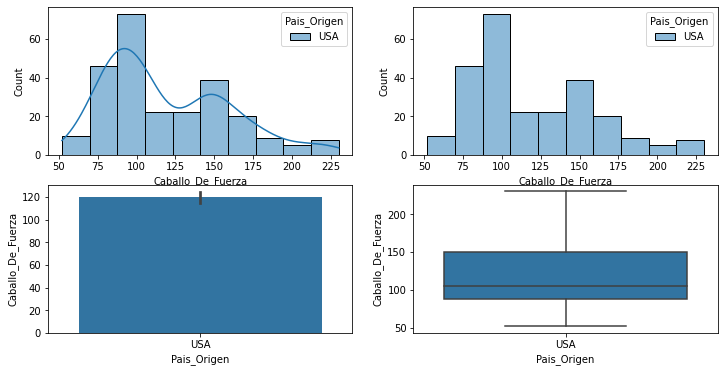

In [24]:
GraficosSimultaneos(data_autos, "USA")

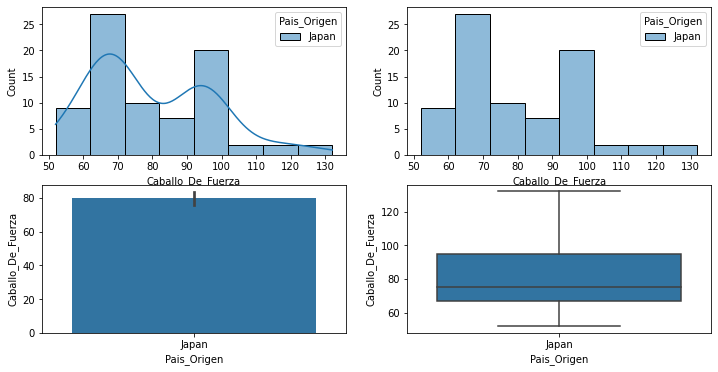

In [25]:
GraficosSimultaneos(data_autos, "Japan")

In [26]:
GraficosSimultaneos(data_autos, "Ecuador")

'No existe ese pais'